In [1]:
%matplotlib inline

import os
import sys

PACKAGE_PARENT = '..'
sys.path.append(PACKAGE_PARENT)

import json
import torch
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

from gaminet import GAMINetClassifier
from gaminet import GAMINetRegressor
from gaminet.utils import local_visualize
from gaminet.utils import global_visualize_density
from gaminet.utils import feature_importance_visualize
from gaminet.utils import plot_trajectory
from gaminet.utils import plot_regularization

In [2]:
from dataset import *
random_state = 0
train_x, test_x, train_y, test_y, task_type, meta_info = get_credit_default(random_state)

In [3]:
def metric_wrapper(metric, scaler):
    def wrapper(label, pred):
        return metric(label, pred, scaler=scaler)
    return wrapper

def auc(label, pred, scaler=None):
    return roc_auc_score(label, pred)

get_metric = metric_wrapper(auc, None)

In [4]:
meta_info.keys()

dict_keys(['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT456', 'FLAG_UTIL_RAT1', 'UTIL_RAT1', 'UTIL_RAT_AVG', 'UTIL_RAT_RANGE', 'UTIL_RAT_MAX', 'FLAG_PAY_RAT1', 'PAY_RAT1', 'PAY_RAT_AVG', 'PAY_RAT_RANGE', 'PAY_RAT_MAX', 'Default Payment'])

In [5]:
model = GAMINetClassifier(interact_num=10,
                          subnet_size_main_effect=[20] * 1,
                          subnet_size_interaction=[20] * 2, 
                          max_epochs=[1000, 1000, 1000],
                          learning_rates=[0.001, 0.001, 0.0001],
                          early_stop_thres=["auto", "auto", "auto"],
                          batch_size=1000,
                          warm_start=True,
                          reg_clarity=0.1,
                          reg_mono=0.1,
                          verbose=True,
                          random_state=random_state)
model.fit(train_x, train_y)

####################Stage 1: Main Effect Training####################
###############Run Warm Initialization for Main Effect###############


Epoch:    1, train loss: 0.45365, validation loss: 0.44343: 100%|██████████| 20/20 [00:00<00:00, 56.66it/s]                        
Epoch:    2, train loss: 0.44176, validation loss: 0.44077: 100%|██████████| 20/20 [00:00<00:00, 211.07it/s]                       
Epoch:    3, train loss: 0.44007, validation loss: 0.44081: 100%|██████████| 20/20 [00:00<00:00, 206.78it/s]                       
Epoch:    4, train loss: 0.43868, validation loss: 0.44169: 100%|██████████| 20/20 [00:00<00:00, 211.25it/s]                       
Epoch:    5, train loss: 0.43841, validation loss: 0.43896: 100%|██████████| 20/20 [00:00<00:00, 217.26it/s]                       
Epoch:    6, train loss: 0.43795, validation loss: 0.43863: 100%|██████████| 20/20 [00:00<00:00, 217.79it/s]                       
Epoch:    7, train loss: 0.43802, validation loss: 0.43844: 100%|██████████| 20/20 [00:00<00:00, 217.19it/s]                       
Epoch:    8, train loss: 0.43717, validation loss: 0.43744: 100%|██████████|

Main Effect Training Stop at Epoch: 23, train loss: 0.43558, validation loss: 0.43928
####################Stage 2: Interaction Training####################
###############Run Warm Initialization for Interaction###############


Epoch:    1, train loss: 0.44718, validation loss: 0.44940: 100%|██████████| 20/20 [00:00<00:00, 66.12it/s]                        
Epoch:    2, train loss: 0.44151, validation loss: 0.44283: 100%|██████████| 20/20 [00:00<00:00, 71.43it/s]                        
Epoch:    3, train loss: 0.43903, validation loss: 0.43923: 100%|██████████| 20/20 [00:00<00:00, 71.84it/s]                        
Epoch:    4, train loss: 0.43578, validation loss: 0.43729: 100%|██████████| 20/20 [00:00<00:00, 71.45it/s]                        
Epoch:    5, train loss: 0.43482, validation loss: 0.43695: 100%|██████████| 20/20 [00:00<00:00, 72.18it/s]                        
Epoch:    6, train loss: 0.43504, validation loss: 0.43712: 100%|██████████| 20/20 [00:00<00:00, 71.19it/s]                        
Epoch:    7, train loss: 0.43393, validation loss: 0.43583: 100%|██████████| 20/20 [00:00<00:00, 72.03it/s]                        
Epoch:    8, train loss: 0.43370, validation loss: 0.43586: 100%|██████████|

Interaction Training Stop at Epoch: 30, train loss: 0.43141, validation loss: 0.43465
#########################Stage 3: Fine Tuning#########################


Epoch:    1, train loss: 0.43051, validation loss: 0.43444: 100%|██████████| 20/20 [00:00<00:00, 68.74it/s]                        
Epoch:    2, train loss: 0.43043, validation loss: 0.43485: 100%|██████████| 20/20 [00:00<00:00, 67.69it/s]                        
Epoch:    3, train loss: 0.43040, validation loss: 0.43496: 100%|██████████| 20/20 [00:00<00:00, 68.71it/s]                        
Epoch:    4, train loss: 0.43035, validation loss: 0.43468: 100%|██████████| 20/20 [00:00<00:00, 67.47it/s]                        
Epoch:    5, train loss: 0.43037, validation loss: 0.43477: 100%|██████████| 20/20 [00:00<00:00, 68.60it/s]                        
Epoch:    6, train loss: 0.43039, validation loss: 0.43447: 100%|██████████| 20/20 [00:00<00:00, 68.85it/s]                        
Epoch:    7, train loss: 0.43029, validation loss: 0.43472: 100%|██████████| 20/20 [00:00<00:00, 68.70it/s]                        
Epoch:    8, train loss: 0.43030, validation loss: 0.43433: 100%|██████████|

Fine Tuning Stop at Epoch: 24, train loss: 0.43012, validation loss: 0.43418


In [6]:
pred_train = model.predict_proba(train_x)[:, 1]
pred_test = model.predict_proba(test_x)[:, 1]
gaminet_stat = np.hstack([np.round(get_metric(train_y, pred_train.ravel()),5),
                          np.round(get_metric(test_y, pred_test.ravel()),5)])
print(gaminet_stat)

[0.78151 0.78169]


In [7]:
gaminet_stat = np.hstack([np.round(np.mean(train_y.ravel() == (pred_train > 0.5).ravel()),5),
                          np.round(np.mean(test_y.ravel() == (pred_test > 0.5).ravel()),5)])
print(gaminet_stat)

[0.8185 0.828 ]


In [8]:
model.certify_mono()

True

In [9]:
for i in model.mono_increasing_list + model.mono_decreasing_list:
    model.partial_derivatives(i)

Global Interpretation

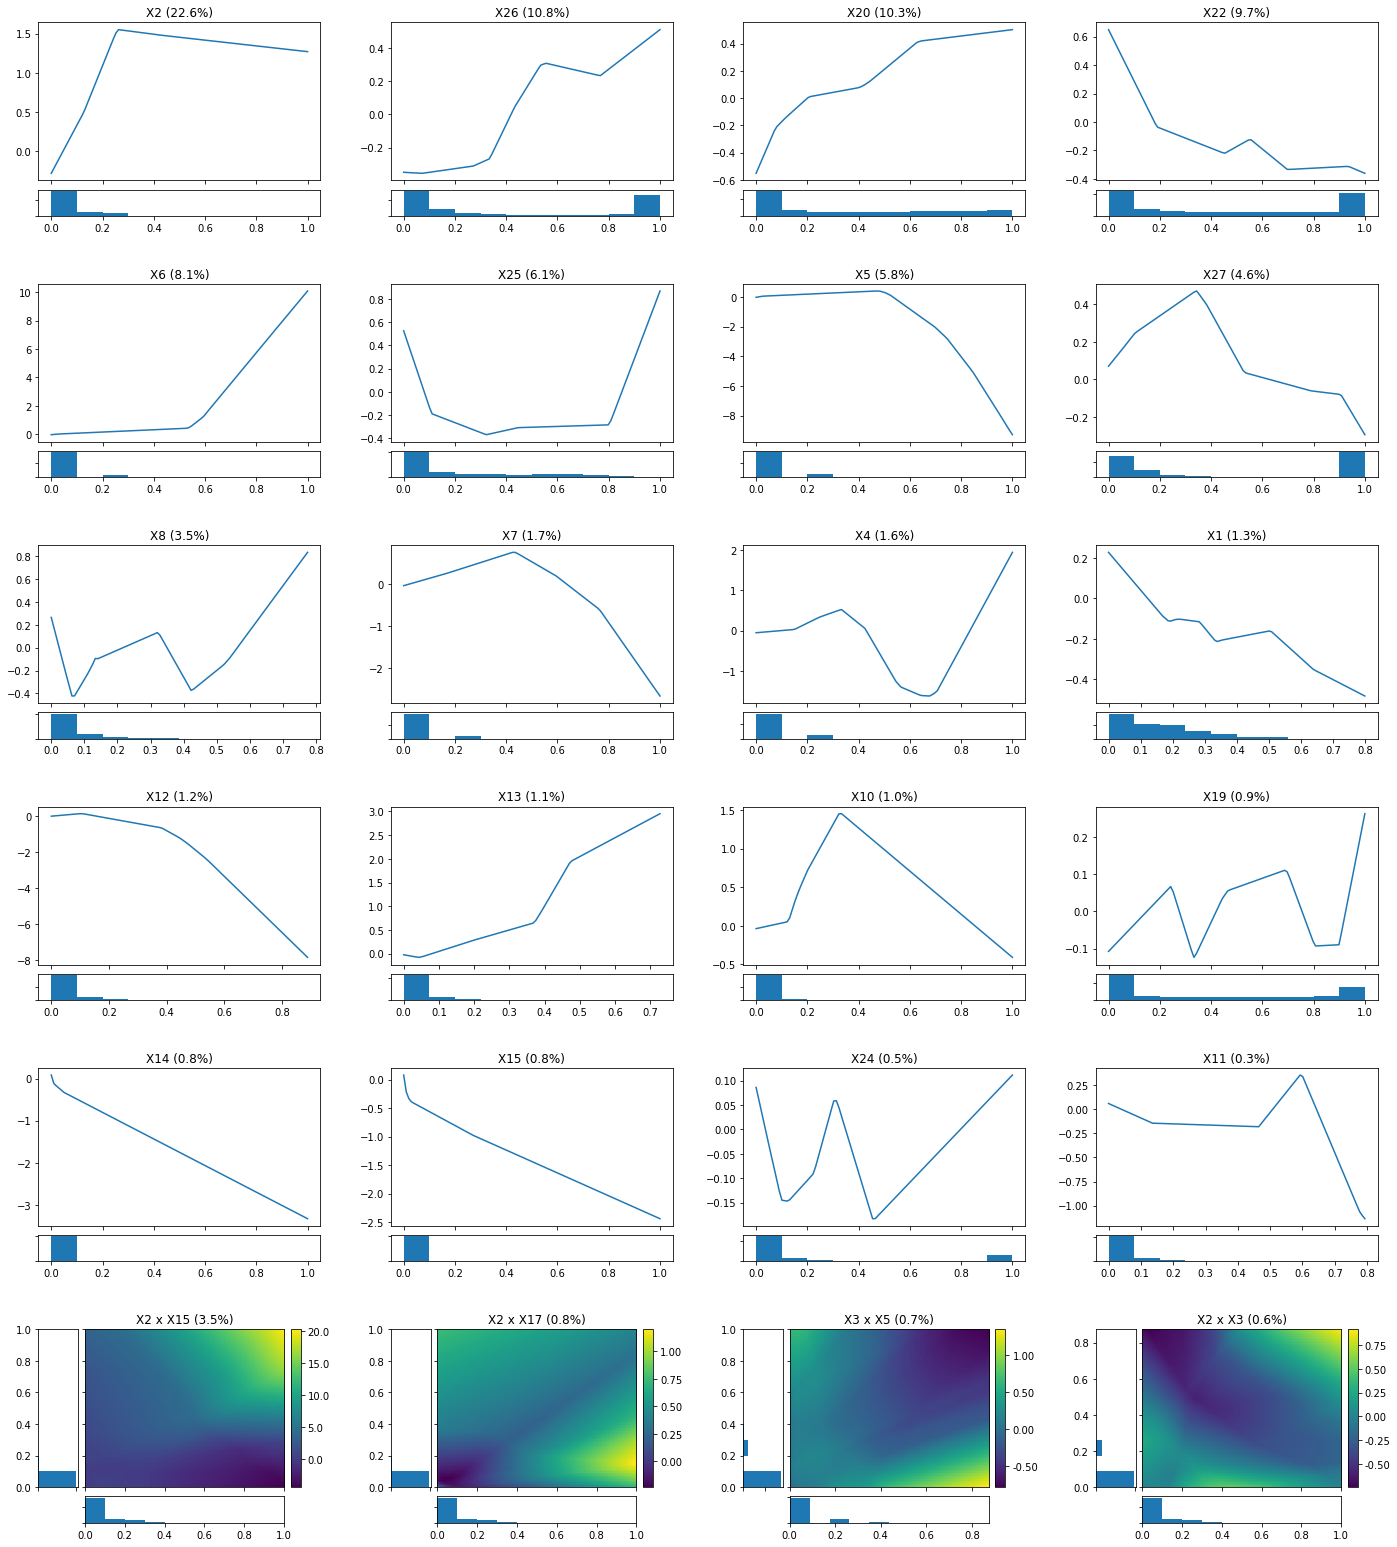

In [10]:
data_dict_global = model.global_explain(save_dict=False)
global_visualize_density(data_dict_global, main_effect_num=40, interaction_num=4, cols_per_row=4)

Feature Importance

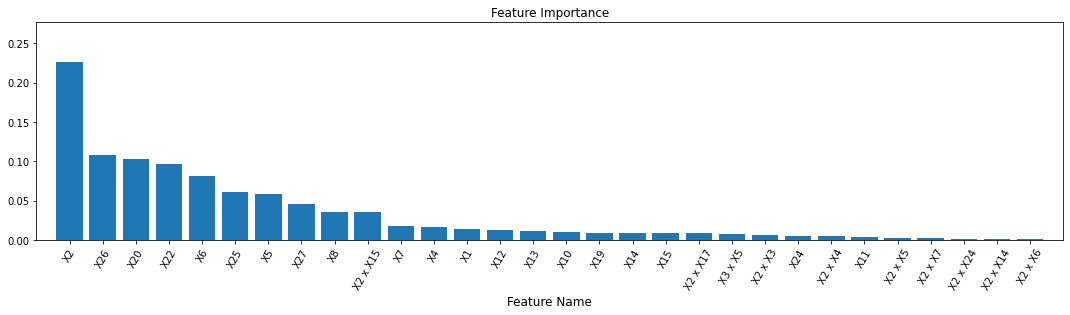

In [11]:
data_dict_global = model.global_explain(save_dict=False)
feature_importance_visualize(data_dict_global)